In [32]:
# !pip install -U scikit-learn pandas matplotlib seaborn
print("d")

d


In [33]:
#Refernce : https://towardsdatascience.com/how-to-use-data-files-from-uci-68b740b4719d
   #  Attribute                     Domain
#    -- -----------------------------------------
#    1. Sample code number            id number
#    2. Clump Thickness               1 - 10
#    3. Uniformity of Cell Size       1 - 10
#    4. Uniformity of Cell Shape      1 - 10
#    5. Marginal Adhesion             1 - 10
#    6. Single Epithelial Cell Size   1 - 10
#    7. Bare Nuclei                   1 - 10
#    8. Bland Chromatin               1 - 10
#    9. Normal Nucleoli               1 - 10
#   10. Mitoses                       1 - 10
#   11. Class:                        (2 for benign, 4 for malignant)

import pandas as pd

dataset = pd.read_csv('/Users/muhammadarbabarshad/Downloads/breast-cancer-wisconsin.data')

dataset.columns = ['Id', 'Clump Thickness', 'Uniformity Cell Size', 'Uniformity Cell Shape', 'Marginal Adhesion', 'Single e Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


dataset.head()

,Id,Clump Thickness,Uniformity Cell Size,Uniformity Cell Shape,Marginal Adhesion,Single e Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [34]:
#drop the id column
dataset.drop(['Id'], axis=1, inplace=True)

#printing number of isntances of dataset where Bare_nuclei is ?
print ( "number of isntances of dataset where Bare_nuclei is ?: "  , dataset[dataset['Bare Nuclei'] == '?'].shape[0])

#drop rows where bare nuclei is ?
dataset = dataset[dataset['Bare Nuclei'] != '?']

#map Class to 0 and 1
dataset['Class'] = dataset['Class'].map(lambda x: 0 if x == 2 else 1)

# Converting the variables to their appropriate types:
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].astype('int64')
dataset['Class'] = dataset['Class'].astype('category')

#balance the number of 0 and 1 in the dataset. The number of 0 should be equal to the number of 1
dataset = dataset.groupby('Class').apply(lambda x: x.sample(dataset['Class'].value_counts().min(), random_state=123)).reset_index(drop=True)

number of isntances of dataset where Bare_nuclei is ?:  16


In [87]:
dataset.shape

(478, 10)

In [35]:
dataset.head()

,Clump Thickness,Uniformity Cell Size,Uniformity Cell Shape,Marginal Adhesion,Single e Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,6,1,1,1,2,1,3,1,1,0
1,1,1,1,1,10,1,1,1,1,0
2,3,1,1,1,2,1,1,1,1,0
3,2,1,1,1,2,1,2,1,1,0
4,1,1,1,1,2,1,1,1,1,0


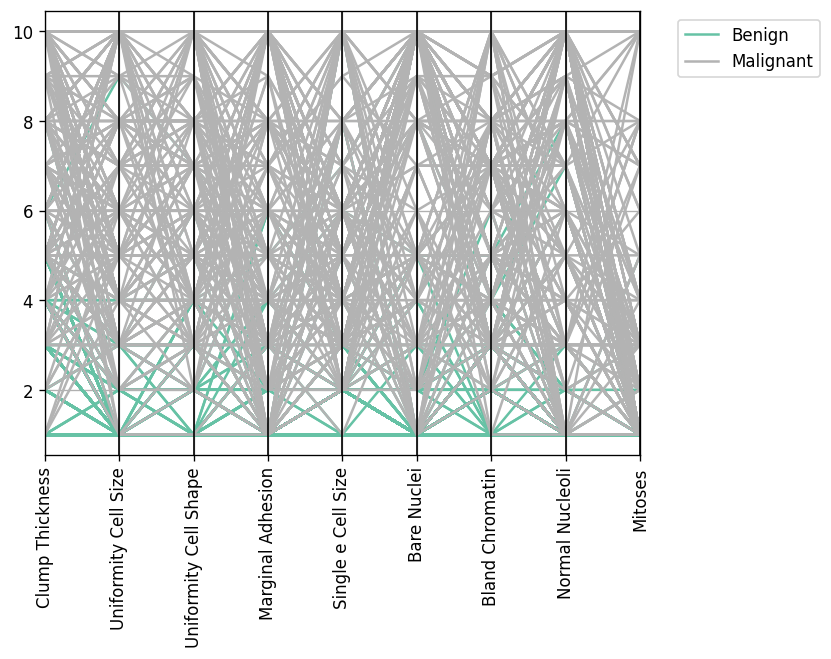

In [36]:
#Getting copy of dataset to plot
dataset_plot = dataset.copy()
#Rename 0 to Benign and 1 to Malignant
dataset_plot['Class'] = dataset_plot['Class'].map(lambda x: 'Benign' if x == 0 else 'Malignant')
# libraries
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# # Take the iris dataset
# import seaborn as sns
# data = sns.load_dataset('iris')

# Make the plot
parallel_coordinates(dataset_plot, 'Class', colormap=plt.get_cmap("Set2"))
#rotate the x axis labels
plt.xticks(rotation=90)

#make the plot high quality
plt.gcf().set_dpi(120)

#change location of legend to right middle

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))


plt.show()
# This plot is 

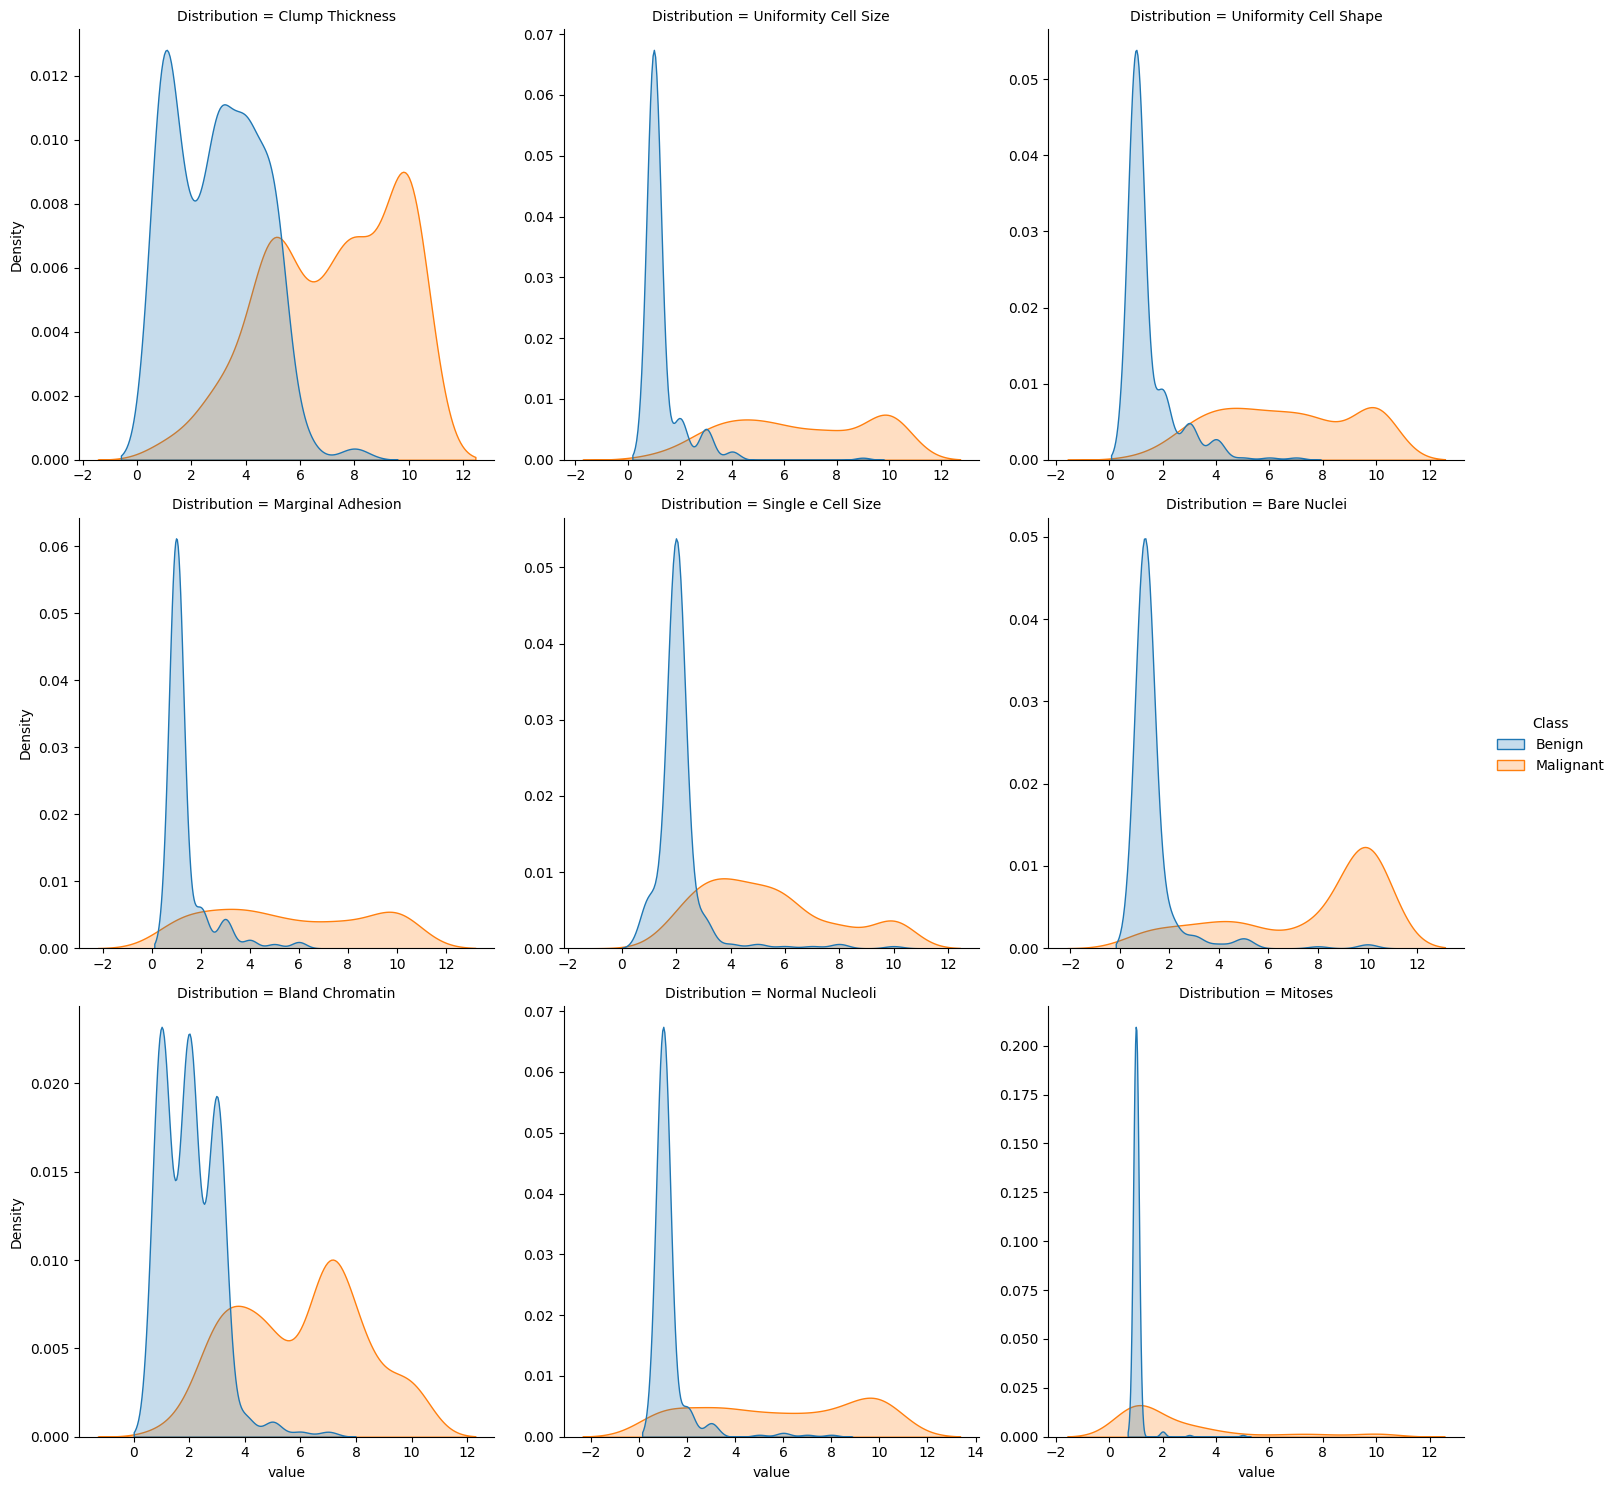

In [37]:
# Plot all columns in single plot with seaborn.displot
#Reference:
import seaborn as sns
dfm = dataset_plot.melt(id_vars='Class', var_name='Distribution')

sns.displot(kind='kde', data=dfm, col='Distribution', col_wrap=3, x='value', hue='Class', fill=True, facet_kws={'sharey': False, 'sharex': False})

#This plot shows the distribution of each column for both classes.




In [38]:
# dataset excluding Class column
X = dataset.iloc[:, :-1].values
# Class column
y = dataset.iloc[:, -1].values

### SVM HyperParameter Tuning

In [39]:
GLOBAL_BEST_PARAMETERS= {}

In [40]:
import numpy
import sklearn, sklearn.datasets, sklearn.utils, sklearn.model_selection, sklearn.svm

C_range, sigma_range, kernel_range=[0.1, 0.5, 1, 3, 9, 100], numpy.array([0.1, 1, 10]),['linear', 'poly', 'rbf', 'sigmoid']

best_C, best_sigma = 0, 0 # placeholders


X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values

# shuffle the data
X, y = sklearn.utils.shuffle(X, y, random_state=1)

# your code here
model = sklearn.svm.SVC(
        random_state=1)

paras = {'C':C_range, 'gamma':sigma_range, 'kernel': kernel_range}

            

#Calling grid searchCV
clf = sklearn.model_selection.GridSearchCV(model, paras, cv=None)
clf.fit(X, y)
#Getting the best value of C
best_C = clf.best_params_['C']
best_sigma = clf.best_params_['gamma']

GLOBAL_BEST_PARAMETERS['SVM']=clf.best_params_


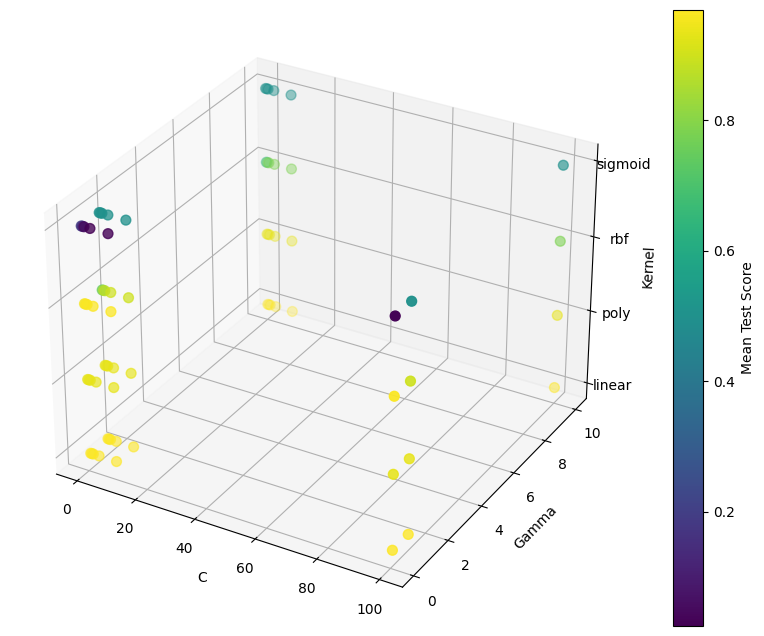

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have the results from the grid search in the results DataFrame
results = pd.DataFrame(clf.cv_results_)

# Convert the data types
results['mean_test_score'] = results['mean_test_score'].astype('float64')
results['param_C'] = results['param_C'].astype('float64')
results['param_gamma'] = results['param_gamma'].astype('float64')
results['param_kernel'] = results['param_kernel']

# Create a mapping from kernel names to integers
kernel_mapping = {name: idx for idx, name in enumerate(results['param_kernel'].unique())}
# Apply the mapping to the param_kernel column
results['param_kernel_int'] = results['param_kernel'].apply(lambda x: kernel_mapping[x])

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the param_C, param_gamma, param_kernel_int, and mean_test_score columns
scatter = ax.scatter(results['param_C'], results['param_gamma'], results['param_kernel_int'],
                     c=results['mean_test_score'], cmap='viridis', s=50)

# Add axis labels
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Kernel')

# Customize z-axis ticks to show kernel names instead of integers
ax.set_zticks(list(kernel_mapping.values()))
ax.set_zticklabels(list(kernel_mapping.keys()))

# Add a colorbar to represent the mean_test_score values
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Mean Test Score')

# Show the plot
plt.show()

In [42]:
#print the parameters with the best score
print('Best parameters: ', clf.best_params_)

Best parameters:  {'C': 9, 'gamma': 0.1, 'kernel': 'linear'}


### Decision Tree HyperParameter Tuning

In [43]:
import numpy
import sklearn, sklearn.datasets, sklearn.utils, sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier

depth_range = [1, 2, 5, 10, 15, 20, 30, 50, 100]
min_samples_split = [2, 5, 10, 15, 20, 30, 50]
min_samples_leaf = [1, 2, 5, 10, 15, 20, 30, 50]

# load the data
X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values

# create the model
model = DecisionTreeClassifier(random_state=1)

# set up the hyperparameter grid
params = {
    'max_depth': depth_range,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# calling GridSearchCV
clf = sklearn.model_selection.GridSearchCV(model, params, cv=None)
clf.fit(X, y)

# getting the best hyperparameters
best_depth = clf.best_params_['max_depth']
best_min_samples_split = clf.best_params_['min_samples_split']
best_min_samples_leaf = clf.best_params_['min_samples_leaf']

print("Best max_depth:", best_depth)
print("Best min_samples_split:", best_min_samples_split)
print("Best min_samples_leaf:", best_min_samples_leaf)

GLOBAL_BEST_PARAMETERS['DT']=clf.best_params_

Best max_depth: 5
Best min_samples_split: 2
Best min_samples_leaf: 2


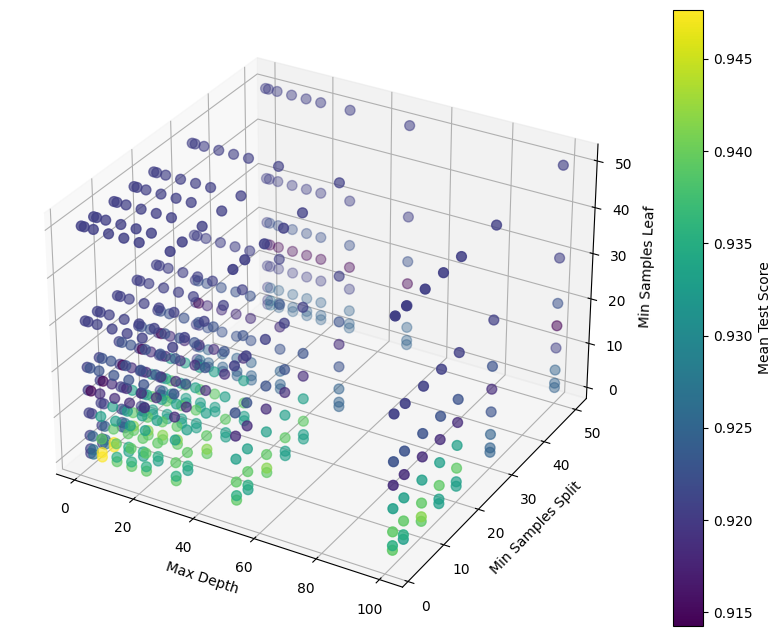

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have the results from the grid search in the results DataFrame
results = pd.DataFrame(clf.cv_results_)

# Convert the data types
results['mean_test_score'] = results['mean_test_score'].astype('float64')
results['param_max_depth'] = results['param_max_depth'].astype('float64')
results['param_min_samples_split'] = results['param_min_samples_split'].astype('float64')
results['param_min_samples_leaf'] = results['param_min_samples_leaf'].astype('float64')

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the param_max_depth, param_min_samples_split, param_min_samples_leaf, and mean_test_score columns
scatter = ax.scatter(results['param_max_depth'], results['param_min_samples_split'], results['param_min_samples_leaf'],
                     c=results['mean_test_score'], cmap='viridis', s=50)

# Add axis labels
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Min Samples Leaf')

# Add a colorbar to represent the mean_test_score values
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Mean Test Score')

# Show the plot
plt.show()

In [45]:
# getting the best hyperparameters
best_depth = clf.best_params_['max_depth']
best_min_samples_split = clf.best_params_['min_samples_split']
best_min_samples_leaf = clf.best_params_['min_samples_leaf']

print("Best max_depth:", best_depth)
print("Best min_samples_split:", best_min_samples_split)
print("Best min_samples_leaf:", best_min_samples_leaf)


Best max_depth: 5
Best min_samples_split: 2
Best min_samples_leaf: 2


In [46]:
# A summary of what has been done so far
# 1. We have loaded the dataset
# 2. We have split the dataset into training and testing sets
# 3. We have performed feature scaling
# 4. We have performed grid search to find the best hyperparameters for the SVM model
# 5. We have performed grid search to find the best hyperparameters for the decision tree model


### Logistic Regression HyperParameter Tuning


In [47]:
# Reference: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
import numpy as np
import sklearn, sklearn.datasets, sklearn.utils, sklearn.model_selection, sklearn.linear_model
from scipy.stats import loguniform

# Set hyperparameters
solver_range = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalty_range = ['none', 'l1', 'l2']
#C_range should be between 0 and 10
C_range= np.arange(0, 10, 0.5)
# C_range = loguniform(1e-5, 100)

# Load the data
X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values


# Shuffle the data
X, y = sklearn.utils.shuffle(X, y, random_state=1)

# Create the model
model = sklearn.linear_model.LogisticRegression(random_state=1)

# Set up hyperparameters for GridSearchCV
params = {'solver': solver_range, 'penalty': penalty_range, 'C': C_range}

# Call GridSearchCV
clf = sklearn.model_selection.GridSearchCV(model, params, cv=None)
clf.fit(X, y)

# Get the best hyperparameters
best_solver = clf.best_params_['solver']
best_penalty = clf.best_params_['penalty']
best_C = clf.best_params_['C']

# Print the best hyperparameters
print(f"Best solver: {best_solver}")
print(f"Best penalty: {best_penalty}")
print(f"Best C: {best_C}")
GLOBAL_BEST_PARAMETERS['LR']=clf.best_params_

/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammada

Best solver: sag
Best penalty: none
Best C: 0.5


/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: Conver

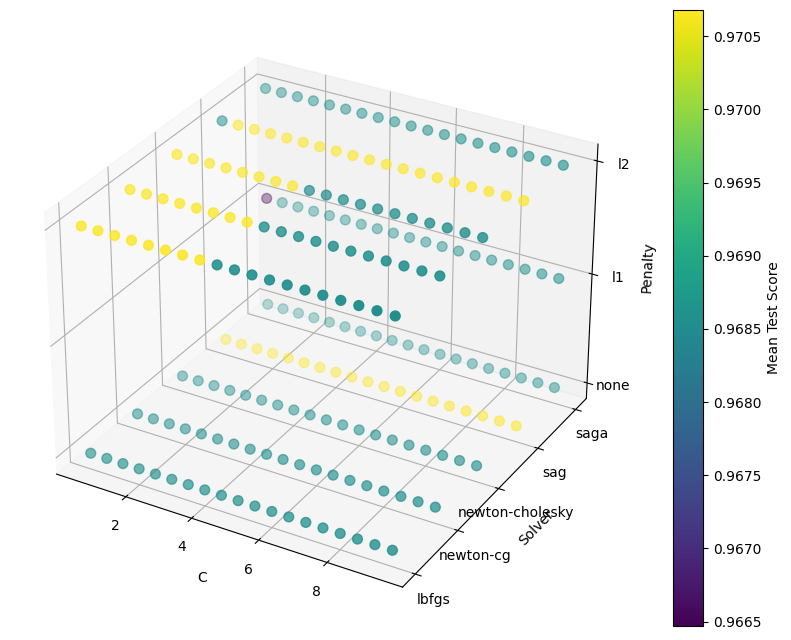

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have the results from the grid search in the results DataFrame
results = pd.DataFrame(clf.cv_results_)

# Convert the data types
results['mean_test_score'] = results['mean_test_score'].astype('float64')
results['param_solver'] = results['param_solver']
results['param_penalty'] = results['param_penalty']
results['param_C'] = results['param_C'].astype('float64')

# Create a mapping from solver and penalty names to integers
solver_mapping = {name: idx for idx, name in enumerate(results['param_solver'].unique())}
penalty_mapping = {name: idx for idx, name in enumerate(results['param_penalty'].unique())}

# Apply the mapping to the param_solver and param_penalty columns
results['param_solver_int'] = results['param_solver'].apply(lambda x: solver_mapping[x])
results['param_penalty_int'] = results['param_penalty'].apply(lambda x: penalty_mapping[x])

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the param_C, param_solver_int, param_penalty_int, and mean_test_score columns
scatter = ax.scatter(results['param_C'], results['param_solver_int'], results['param_penalty_int'],
                     c=results['mean_test_score'], cmap='viridis', s=50)

# Add axis labels
ax.set_xlabel('C')
ax.set_ylabel('Solver')
ax.set_zlabel('Penalty')

# Customize y-axis and z-axis ticks to show solver and penalty names instead of integers
ax.set_yticks(list(solver_mapping.values()))
ax.set_yticklabels(list(solver_mapping.keys()))
ax.set_zticks(list(penalty_mapping.values()))
ax.set_zticklabels(list(penalty_mapping.keys()))

# Add a colorbar to represent the mean_test_score values
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Mean Test Score')

# Show the plot
plt.show()

### Cross validation (use cross validation to obtain the performance of the models implemented in your code and draw a conclusion which one is the most accurate one) 

#### SVM

In [49]:


import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC

# Load the dataset

X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values


# Replace with your best parameters obtained from your previous code
best_params = GLOBAL_BEST_PARAMETERS['SVM']

# Create an SVM model with the best parameters
svm = SVC(**best_params)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_scores = cross_val_score(svm, X, y, cv=kf)

print("10-fold cross-validation scores:")
print(cv_scores)

print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))



10-fold cross-validation scores:
[0.95833333 0.95833333 1.         0.97916667 0.95833333 0.97916667
 0.9375     0.95833333 0.95744681 0.95744681]
Mean CV accuracy: 0.9644060283687944
Standard deviation of CV accuracy: 0.01634316385229562


#### Decision tree

In [50]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load the dataset

X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values


# Replace with your best parameters obtained from your previous code
best_params = GLOBAL_BEST_PARAMETERS['DT']

# Create an SVM model with the best parameters
dt = DecisionTreeClassifier(**best_params)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_scores = cross_val_score(dt, X, y, cv=kf)

print("10-fold cross-validation scores:")
print(cv_scores)

print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))

10-fold cross-validation scores:
[0.89583333 0.9375     0.97916667 0.85416667 0.95833333 0.95833333
 0.9375     0.89583333 0.9787234  0.93617021]
Mean CV accuracy: 0.9331560283687942
Standard deviation of CV accuracy: 0.038122525926925964


#### Logistic regression


In [51]:


import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import sklearn, sklearn.datasets
from sklearn.svm import SVC

# Load the dataset

X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values


# Replace with your best parameters obtained from your previous code
best_params = GLOBAL_BEST_PARAMETERS['LR']

# Create an SVM model with the best parameters
lr = sklearn.linear_model.LogisticRegression(**best_params)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_scores = cross_val_score(lr, X, y, cv=kf)

print("10-fold cross-validation scores:")
print(cv_scores)

print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))



10-fold cross-validation scores:
[0.95833333 0.97916667 1.         0.97916667 0.95833333 0.97916667
 0.9375     0.97916667 0.9787234  0.9787234 ]
Mean CV accuracy: 0.9728280141843971
Standard deviation of CV accuracy: 0.01623823344660759


/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhamma

In [52]:
# All

import numpy as np
import sklearn.datasets
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
# Load the dataset
X, y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values


models = {
    'LR': LogisticRegression,
    'DT': DecisionTreeClassifier,
    'SVM': SVC
}

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Train Score Mean', 'Train Score Std', 'Test Score Mean', 'Test Score Std', 'Time'])

for name, model_class in models.items():
    # Replace with your best parameters obtained from your previous code
    best_params = GLOBAL_BEST_PARAMETERS[name]

    # Create a model with the best parameters
    model = model_class(**best_params)

    start_time = time.time()
    cv_results = cross_validate(model, X, y, cv=kf, return_train_score=True)
    end_time = time.time()

    # Calculate the time taken
    time_taken = end_time - start_time

    # Store the results in the DataFrame


    this_result= \
    {
        'Model': name,
        'Train Score Mean': np.mean(cv_results['train_score']),
        'Train Score Std': np.std(cv_results['train_score']),
        'Test Score Mean': np.mean(cv_results['test_score']),
        'Test Score Std': np.std(cv_results['test_score']),
        'Time': time_taken
    }
    results = pd.concat([results, pd.DataFrame([this_result])], ignore_index=True)


/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muhammadarbabarshad/miniconda3/envs/Project-env1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/muhamma

In [53]:
results

,Model,Train Score Mean,Train Score Std,Test Score Mean,Test Score Std,Time
0,LR,0.977452,0.001819,0.972828,0.016238,0.035556
1,DT,0.981867,0.003423,0.937323,0.030844,0.008817
2,SVM,0.980474,0.002589,0.964406,0.016343,0.082329


In [54]:
#make a copy of the results
results_percentage = results.copy()

#multiply by 100 to get percentage
results_percentage[['Train Score Mean', 'Train Score Std', 'Test Score Mean', 'Test Score Std']] *= 100

#Convert time to milliseconds
results_percentage['Time'] *= 1000


results_percentage

,Model,Train Score Mean,Train Score Std,Test Score Mean,Test Score Std,Time
0,LR,97.745211,0.181873,97.282801,1.623823,35.555840
1,DT,98.186694,0.342291,93.732270,3.084368,8.816719
2,SVM,98.047429,0.258866,96.440603,1.634316,82.328796


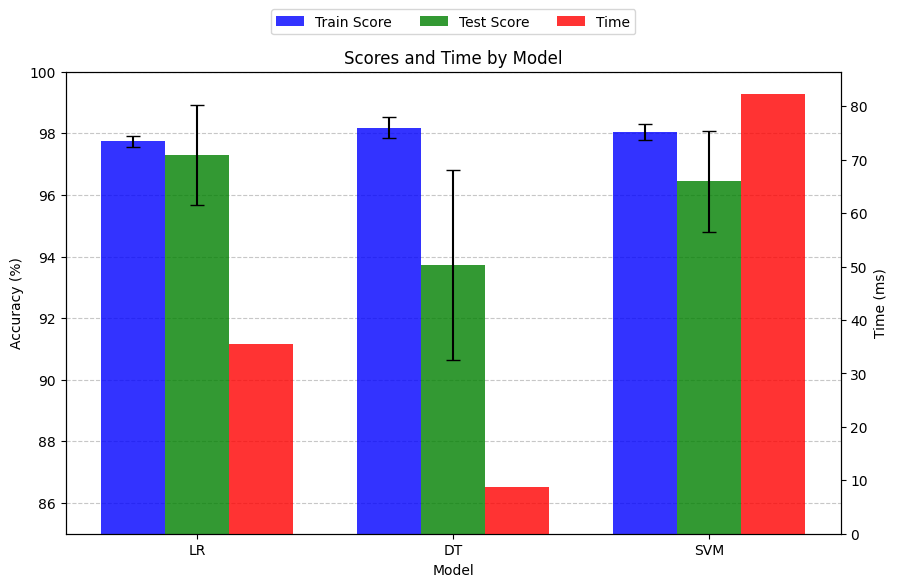

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df=results_percentage   

# Set up the plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
bar_width = 0.25
opacity = 0.8
index = np.arange(len(df))

# Plot the scores
train_bars = ax1.bar(index, df['Train Score Mean'], bar_width,
                     alpha=opacity, color='b',
                     yerr=df['Train Score Std'],
                     error_kw={'ecolor': 'black', 'capsize': 5},
                     label='Train')

test_bars = ax1.bar(index + bar_width, df['Test Score Mean'], bar_width,
                    alpha=opacity, color='g',
                    yerr=df['Test Score Std'],
                    error_kw={'ecolor': 'black', 'capsize': 5},
                    label='Test')

# Plot the time
time_bars = ax2.bar(index + 2 * bar_width, df['Time'], bar_width,
                    alpha=opacity, color='r',
                    label='Time')

# Add labels and titles
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy (%)')
ax2.set_ylabel('Time (ms)')
ax1.set_title('Scores and Time by Model')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(df['Model'])

# Create a custom legend
legend_elements = [
    train_bars[0],
    test_bars[0],
    time_bars[0]
]
legend = ax1.legend(legend_elements, ['Train Score', 'Test Score', 'Time'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

# Bring the legend to the foreground
legend.set_zorder(10)

# Customize the plot
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_axisbelow(True)

# Adjust the range of the y-axis for scores
ax1.set_ylim(85, 100)

#Put legends outside



# Show the plot
plt.show()


In [56]:
GLOBAL_BEST_PARAMETERS

{'SVM': {'C': 9, 'gamma': 0.1, 'kernel': 'linear'},
 'DT': {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2},
 'LR': {'C': 0.5, 'penalty': 'none', 'solver': 'sag'}}

In [31]:
# Done so far:
# 1. We have loaded the dataset
# 2. We have split the dataset into training and testing sets
# 3. We have performed feature scaling
# 4. We have performed grid search to find the best hyperparameters for the SVM model
# 5. We have performed grid search to find the best hyperparameters for the decision tree model
# 6. We have performed grid search to find the best hyperparameters for the logistic regression model
# 7. We have performed 10-fold cross-validation for the SVM model
# 8. We have performed 10-fold cross-validation for the decision tree model
# 9. We have performed 10-fold cross-validation for the logistic regression model
# 10. We have compared the performance of the three models



# HW2

In [81]:
import numpy as np

def logistic_sigmoid(x):
    return 1 / (1 + np.exp(-x))

def learn_and_visual_mse(X, y, filename):

    w = np.array([0,0,0,0,0,0,0,0,0,0]) # just a placeholder

    # your code below
    X = np.hstack((X, np.ones((X.shape[0], 1))))
    #calculate w

    compound = np.matmul(np.transpose(X), X)
    compund_pseudo_inversed = np.linalg.pinv(compound)
    all_but_y = np.matmul(compund_pseudo_inversed, np.transpose(X))
    w = np.matmul(all_but_y, y)
    # your code above 

    return w


w = learn_and_visual_mse(X, y.astype("int64"), "test.png")
#calculate predictions using w
X = np.hstack((X, np.ones((X.shape[0], 1))))
predictions = logistic_sigmoid(np.dot(X, w))
#convert predictions to 0 and 1
predictions = np.where(predictions > 0.5, 1, 0)

print("predictions:") 
print(predictions)

predictions:
[1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [73]:
y.astype("int64")

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
y

[0, 0, 0, 0, 0, ..., 1, 1, 1, 1, 1]
Length: 478
Categories (2, int64): [0, 1]

In [84]:
# Accuracy between predictions and y
accuracy = numpy.sum(predictions == y) / len(y)
print ("accuracy:", accuracy)

accuracy: 0.6338912133891214
